# 1. Load a binary classification dataset (e.g., Breast Cancer dataset).

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

In [77]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [78]:
x = pd.DataFrame(data.data, columns=data.feature_names)  # Convert to DataFrame for easy handling
y = pd.DataFrame(data.target)  # Convert to DataFrame for easy handling
print(x)
print(y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [79]:
x.info()
print("null values")
print("x:",x.isnull().sum().sum())  # Check for missing values
print("y:",y.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

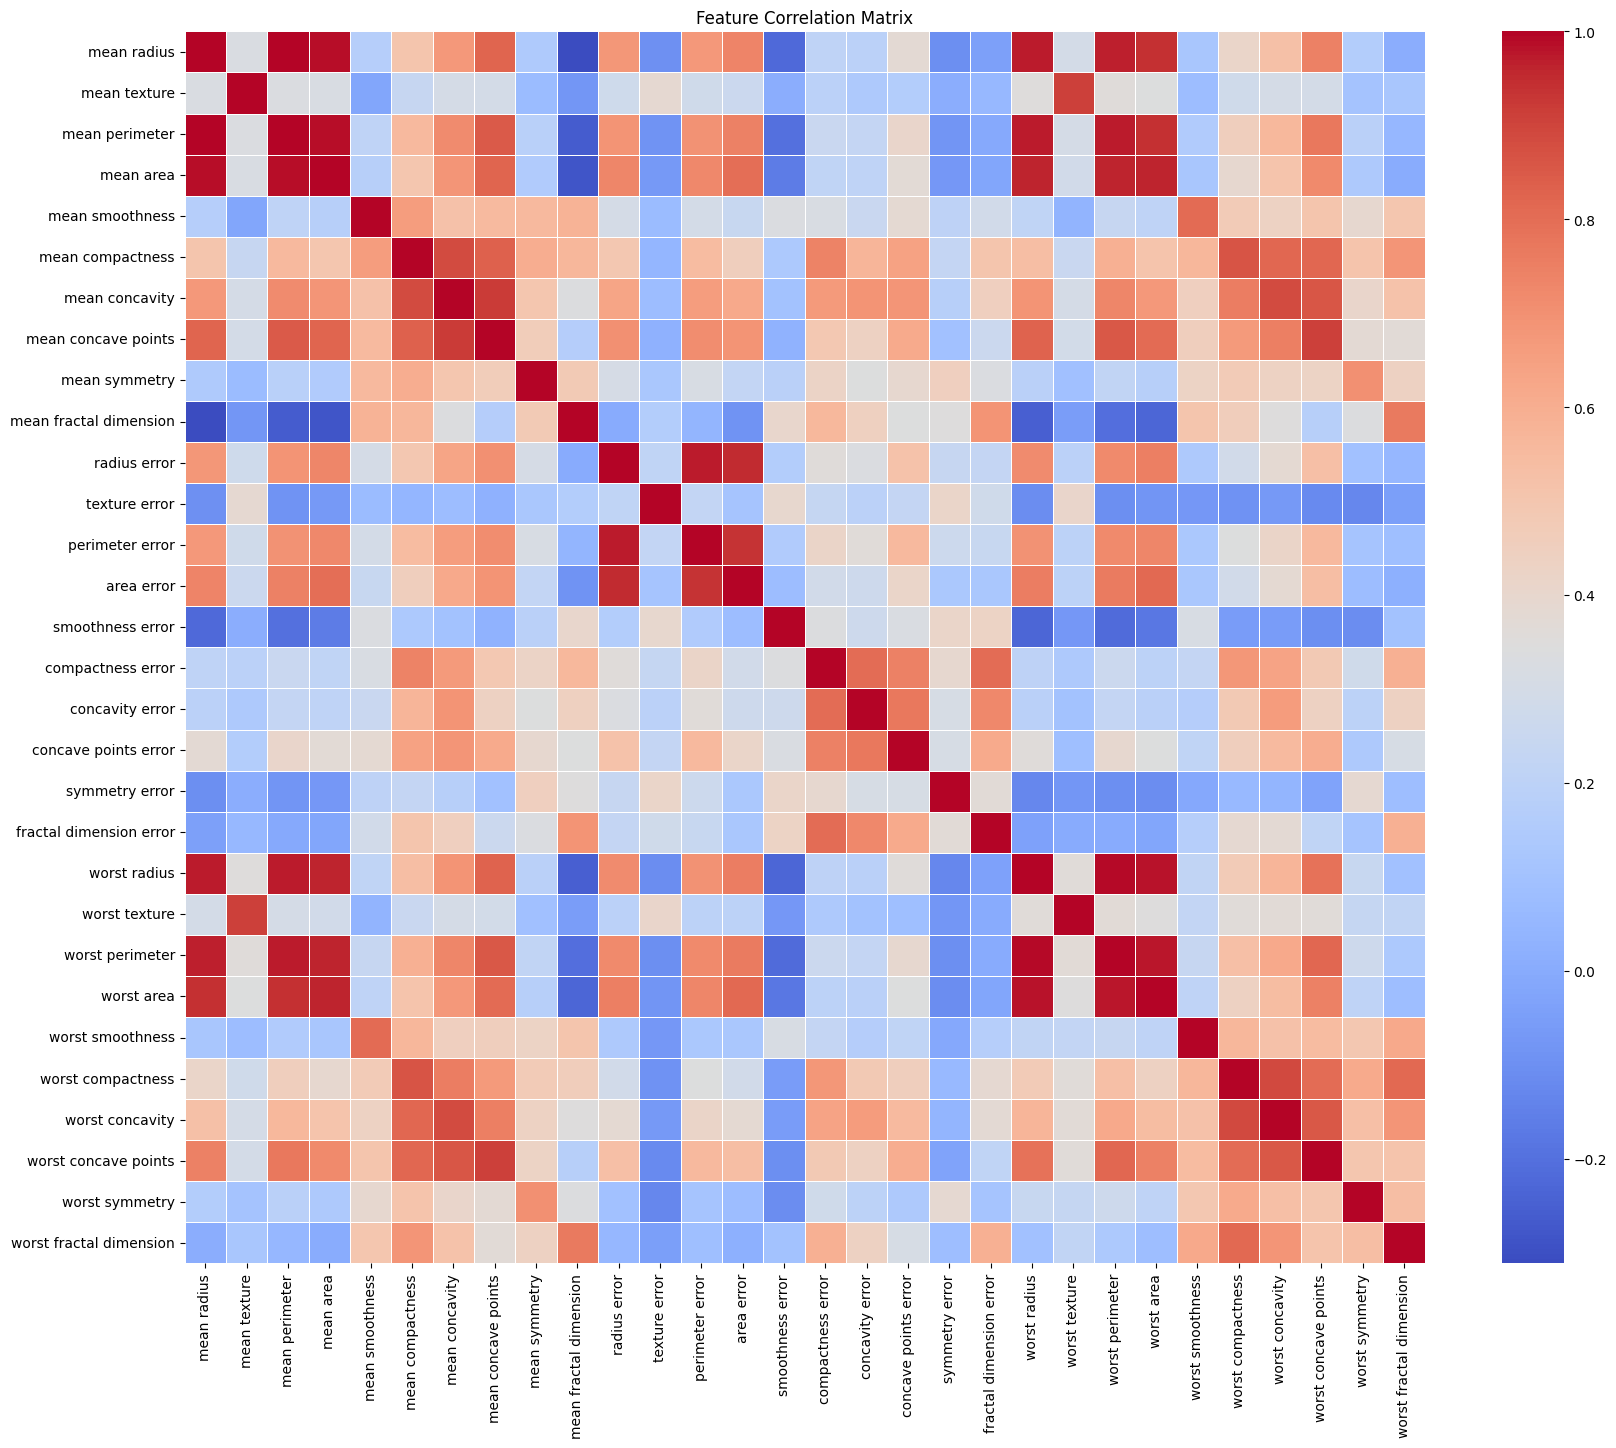

In [80]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(x, columns=data.feature_names)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


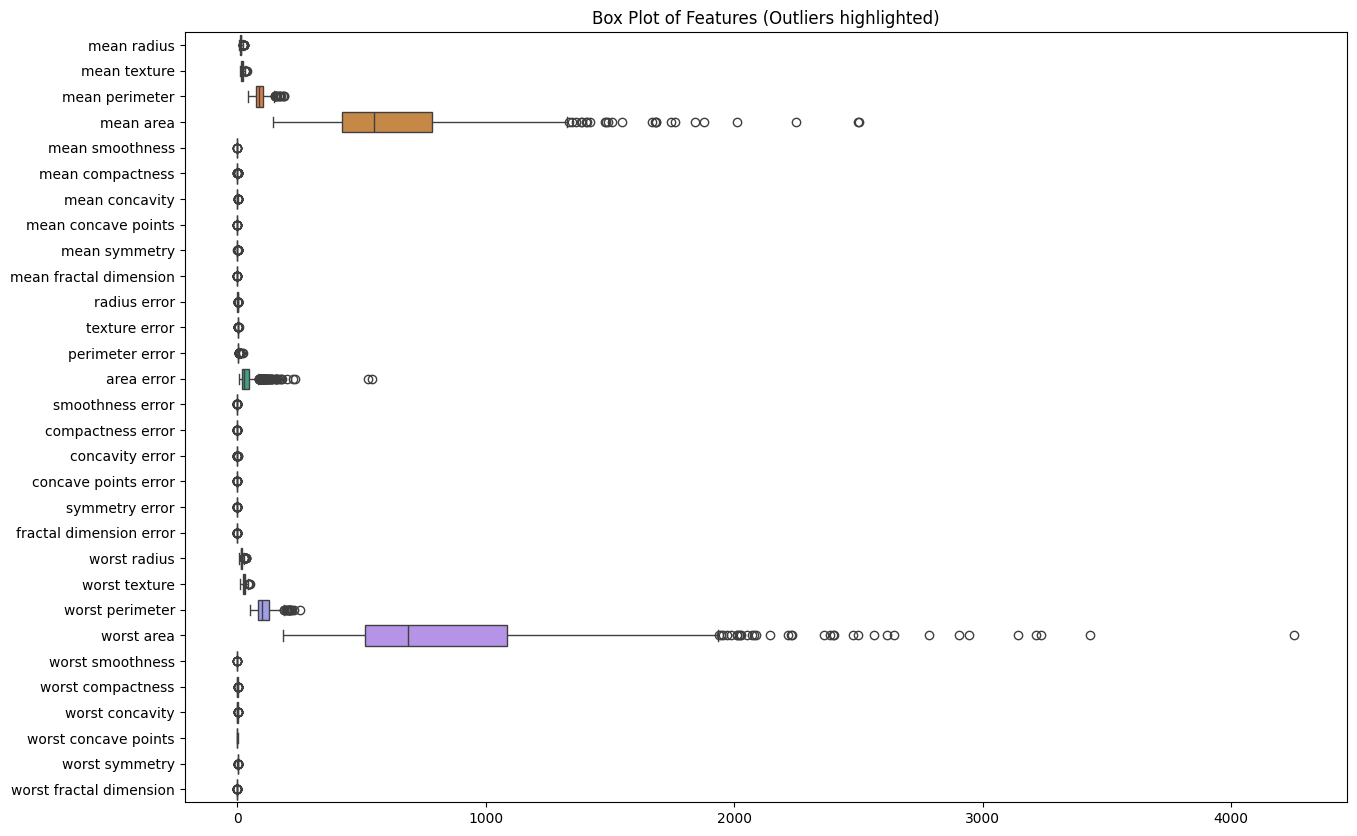

In [81]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h")
plt.title("Box Plot of Features (Outliers highlighted)")
plt.show()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [82]:
def remove_outliers_iqr(a):
  # Calculate Q1 (25th percentile) and Q3 (75th percentile)
  Q1 = a.quantile(0.25)
  Q3 = a.quantile(0.75)
  IQR = Q3 - Q1

  # Define the bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Identify and remove outliers
  a_clean = a[~((a < lower_bound) | (a > upper_bound)).any(axis=1)]
  return a_clean
df_cleaned = remove_outliers_iqr(df)

In [83]:
df = df_cleaned

In [84]:
from sklearn.model_selection import train_test_split
x = df.values
y = y.loc[df.index] # Align 'y' index with 'df' index
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=702)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 30) (80, 30) (318, 1) (80, 1)


In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Implement logistic regression using scikit-learn.


In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=702)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 3. Evaluate the model using accuracy, precision, recall, and plot the ROC curve

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Accuracy : correct predictions / total predictions made.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100}%")

# Confusion Matrix :
# true positive (TP)      true negative (TN)
# false positive (FP)     false negative (FN)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=data.target_names)
print("Classification Report:\n", class_report)

# ROC-AUC Score
y_prob = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 97.5%
Confusion Matrix:
 [[21  1]
 [ 1 57]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        22
      benign       0.98      0.98      0.98        58

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80

ROC-AUC Score: 0.9976489028213167


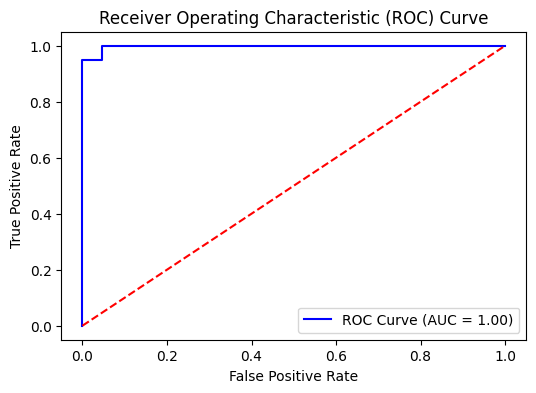

In [88]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()